<a href="https://colab.research.google.com/github/swaspicious/ML-Models/blob/main/Building_linear_regression_model_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

***Note*** -  Whenever you create an object from a class, **self** is how the class remembers which object’s data it is dealing with. It is basically a reference to the instance of the class you're working with.

self -> makes the variables belong to the specific object (so multiple objects can have different stored values).

**Linear regression:**

In [ ]:
class linear_regression():

  # to initialize the parameters. these are the hyperparameters
  def __init__(self, learningrate, no_of_iterations):
    self.learningrate = learningrate
    self.no_of_iterations = no_of_iterations


  # to fit the data to our model
  def fit(self, x, y):

    # number of training examples (no. of datapoints used for training) and number of features
    self.m , self.n = x.shape   # no. of rows (m -> no. of datapoints) and columns (n -> no. of features)

    #initiatializing the weight and bias:
    self.w = np.zeros(self.n)  # creating a numpy array of zeroes for the features present in the dataset(hence passed self.n), since each feature might have different weights.
    self.b = 0
    self.x = x
    self.y = y

    #implemeting the gradient descent:
    for i in range(self.no_of_iterations):
      self.update_weights()

  # to update the parameters 'weights' and 'bias':
  def update_weights(self):
    y_prediction = self.predict(self.x)   # all the y values predicted by our model will be stores in our y_prediction array.

    # calculate gradients:
    dw = - (2*(self.x.T).dot(self.y - y_prediction)) / self.m  # .T is for transpose [(n,m)*(m) -> (n)]. the formula already computes the sum over all samples for each feature because of the matrix multiplication.
    db = - 2 * np.sum(self.y - y_prediction) / self.m

    # updating the weights:
    self.w = self.w - self.learningrate * dw
    self.b = self.b - self.learningrate * db


  # to predict the target variable from the given feature variable
  def predict(self, x):
    return x.dot(self.w) + self.b   # since y = w*x + b; dot product cuz both 'x' and 'w' are arrays (30x1)

y pred = 0(x) + 0 = initial value -> max loss function. since error = y - y pred = y-0 = y

In [ ]:
# model = linear_regression() ->  just one instance of our linear regression model

#**Using linear regression model for prediction**

***Workflow of a linear regression model:***

Step 1: Set learning rate and number of iterations. Initiate random weight and bias value. (commonly set w=0, b=0 for linear regression)

Step 2: Build linear regression equation (y = wx+b)

Step 3: Find the 'y pred' value for given x value for the corresponding weight and bias.

Step 4: Check the loss function for these parameter values (difference between 'y pred' and 'true y')

Step 5: Update the parameter values using Gradient Descent (new weight and bias value)
:: w = w - L.dw , b = b - L.db

Step 6: Steps 3,4,5 are repeated till we get minimum loss function value.

Finally we will get the best & most optimal model (with best weight and bias value) as it has minimum loss function.

NOTE: weight value is always initialized as an array because the number of weights will depend on the number of feature variables in the dataset. (in this case, it's only 1 ,i.e. years of experience)

In [ ]:
# importing the dependencies:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Data pre-processing:**

In [ ]:
# loading the data from the csv file to pandas dataframe:
salarydata = pd.read_csv('/content/salary_data.csv')

In [ ]:
salarydata.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salarydata.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salarydata.shape

(30, 2)

In [ ]:
# checking and handling the missing values (if any) in our dataset:
salarydata.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
# splitting the feature and target variables:

x = salarydata.iloc[:,:-1].values  # this removes the salary column (which is column 1; hence -1) from the dataset and assigns the rest of it to x
y = salarydata.iloc[:,1].values    # this assigns the salary column (column 1) to y

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
# splitting the dataset into training and test data:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=2)

**Training the linear regression model:**

In [ ]:
model = linear_regression(learningrate=0.02, no_of_iterations=1000) # we are loading the linear regression model in a variable named 'model'

In [ ]:
model.fit(xtrain , ytrain) # feeding & training the model with the xtrain and ytrain values

In [ ]:
# printing the parameters values (weights and bias):

print('weight = ', model.w[0])  # w[0] represents weight for feature 1 (index 0). similarly, w[1] would represent weight for feature 2, and so on...
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


trained model's linear regression equation: y = 9514(x) + 2369

-> salary = 9514(work experience) + 2369


---



**Predicting the salary value for the test data:**

In [ ]:
testdata_prediction = model.predict(xtest)

In [ ]:
print(testdata_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


**Visualizing the predicted salary values and actual values:**

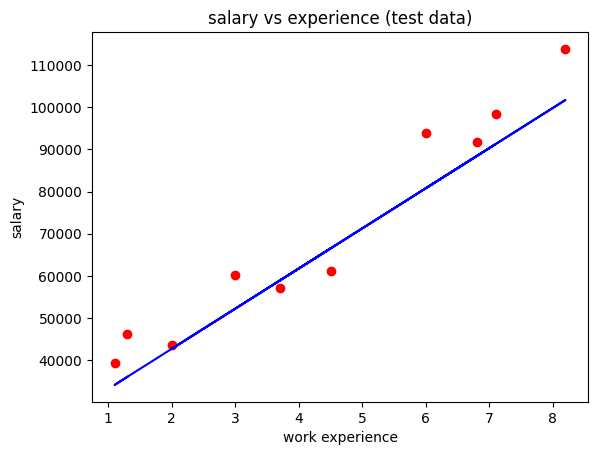

In [ ]:
plt.scatter(xtest, ytest, color='red')
plt.plot(xtest, testdata_prediction, color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience (test data)')
plt.show()

This line represents the best fit for the test data based on the number of iterations and learning rate. It uses the optimal values of weight and bias calculated by it to predict the target variable and its corresponding equation of linear regression.